In [1]:
# Biphasic activity pattern
import numpy as np
import pandas as pd
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import os
import pyfilaments.analysisutils as analysis
from tqdm import tqdm

from joblib import Parallel, delayed
import multiprocessing
import h5py



linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

In [2]:
# Initialize variables

activity_states = ['slow', 'fast']

counter = {'slow':0, 'fast':0}

N_cycles = {'slow':1, 'fast':10}

tau = {'slow':1000, 'fast':250}

curr_state = 'slow' # Can be 1: "fast" or 0:"slow"

duty_cycle = 0.5

curr_activity = -1
prev_activity = -1

t_start = 0

tau_activity = tau[curr_state]

def square_wave_activity(t):
    ''' Output a square-wave profile based on a cycle time-scale and duty-cycle
    '''
    phase = t%tau_activity 
    if(phase > tau_activity*duty_cycle):
        return 1
    elif phase < tau_activity*duty_cycle:
        return -1
    else:
        return 0

def biphasic_activity_pattern(t):
    global curr_state, curr_activity, prev_activity, t_start, tau_activity, counter
    
    
    # If the number of cycles in the current phase elapsed then switch the phase
    if curr_state == 'slow' and counter['slow']>=N_cycles['slow']:
        curr_state = 'fast'
        counter['fast'] = 0
        t_start = t
    elif curr_state =='fast' and counter['fast']>=N_cycles['fast']:
        curr_state = 'slow'
        counter['slow'] = 0
        t_start = t
        
    # Count each activity cycle in the current phase
    if curr_activity == -1 and prev_activity==1 or (curr_activity==-1 and prev_activity==0):
        counter[curr_state]+=1
    
    prev_activity = curr_activity
        
     # Set the activity parameter based on current state
    tau_activity = tau[curr_state]
    
    # Get the square-wave activity profile based on current state
    t_elapsed = t - t_start # Elapsed time since the start of current activity phase
    
    curr_activity = square_wave_activity(t_elapsed)
        
    
    return curr_activity
        
        
            
    
        
    

In [3]:
# Test the activity profile
N_cycles_total = 40
Tf = N_cycles_total*tau['slow']

t_array = np.arange(0, Tf, 1)

activity_profile = np.zeros_like(t_array)


for ii, t in enumerate(t_array):
    
    activity_profile[ii] = biphasic_activity_pattern(t)

<IPython.core.display.Javascript object>


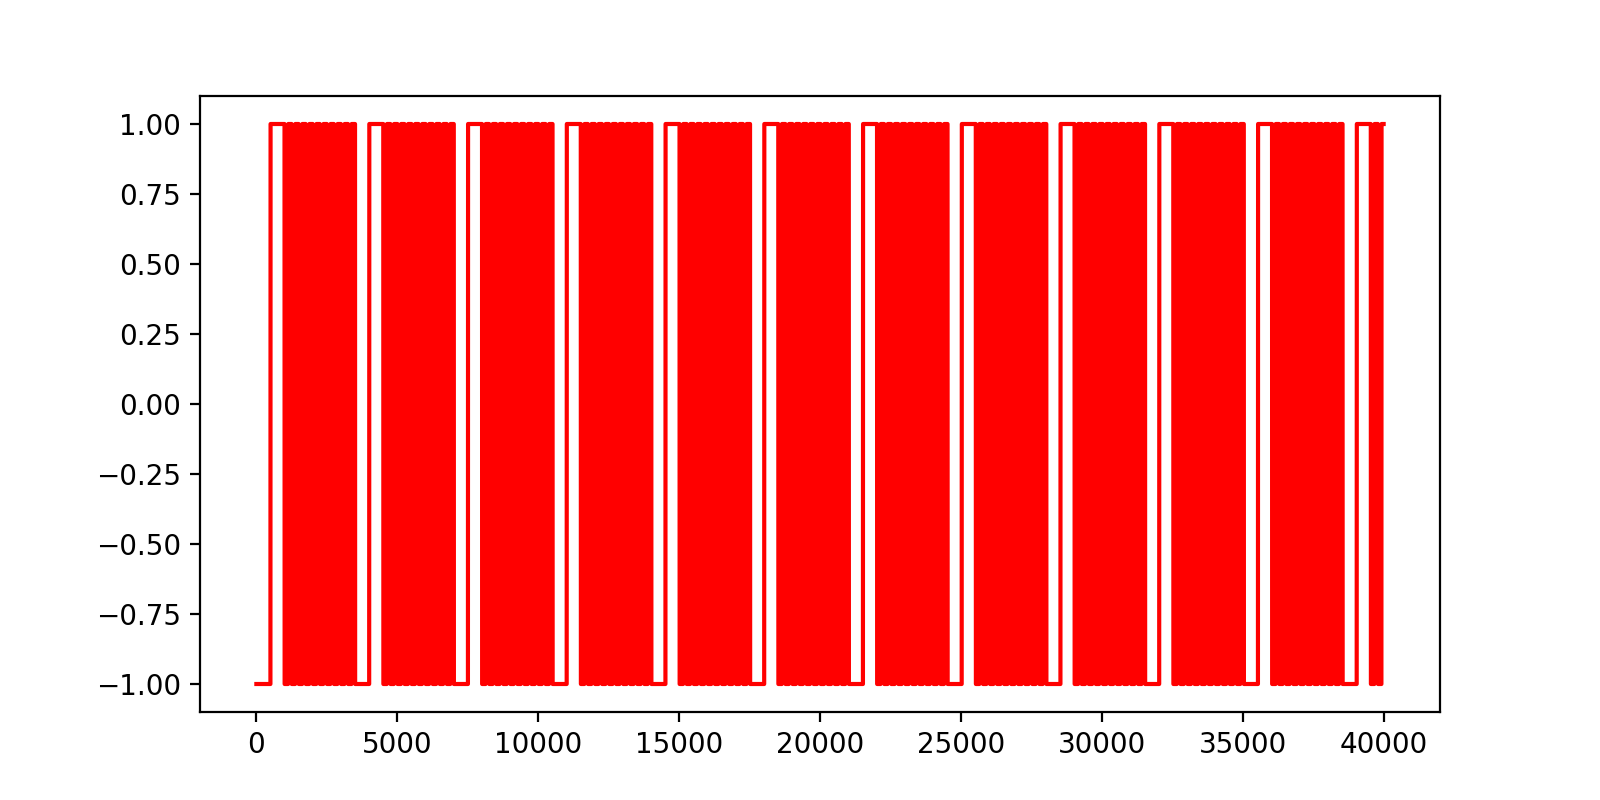

In [4]:
# Plot the activity profile
%matplotlib notebook
plt.figure(figsize = (8,4))

plt.plot(t_array, activity_profile, 'r-')

plt.show()

In [2]:
# Test the object implementation
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
    
from pyfilaments.activityPatternGenerator import activityPatternGenerator


In [8]:
slow_timescale = 750
fast_timescale = 250
n_slow_cycles = 1
n_fast_cycles = 1
n_activity_cycles = 1 # No:of activity cycles we want to simulate (for biphasic activity this is the number of slow and fast cycles)
Tf = n_activity_cycles*(n_slow_cycles*slow_timescale+n_fast_cycles*fast_timescale)
time_step_save = 5 # This is roughly 4X the axial stretch time-scale which is the smallest time-scale in the dynamics

activity_parameters = {'type':'biphasic','activity time scale':{'slow':slow_timescale, 'fast':fast_timescale}, 
                       'duty_cycle':0.5,'N_cycles':{'slow':n_slow_cycles, 'fast':n_fast_cycles}, 'start_state':'slow', 'start phase':0}



activity_gen = activityPatternGenerator(activity=activity_parameters)

In [11]:
t_array = np.arange(0, Tf, 1)

activity_array = activity_gen.activity_profile(t_array)

0, slow, -1
1, slow, -1
2, slow, -1
3, slow, -1
4, slow, -1
5, slow, -1
6, slow, -1
7, slow, -1
8, slow, -1
9, slow, -1
10, slow, -1
11, slow, -1
12, slow, -1
13, slow, -1
14, slow, -1
15, slow, -1
16, slow, -1
17, slow, -1
18, slow, -1
19, slow, -1
20, slow, -1
21, slow, -1
22, slow, -1
23, slow, -1
24, slow, -1
25, slow, -1
26, slow, -1
27, slow, -1
28, slow, -1
29, slow, -1
30, slow, -1
31, slow, -1
32, slow, -1
33, slow, -1
34, slow, -1
35, slow, -1
36, slow, -1
37, slow, -1
38, slow, -1
39, slow, -1
40, slow, -1
41, slow, -1
42, slow, -1
43, slow, -1
44, slow, -1
45, slow, -1
46, slow, -1
47, slow, -1
48, slow, -1
49, slow, -1
50, slow, -1
51, slow, -1
52, slow, -1
53, slow, -1
54, slow, -1
55, slow, -1
56, slow, -1
57, slow, -1
58, slow, -1
59, slow, -1
60, slow, -1
61, slow, -1
62, slow, -1
63, slow, -1
64, slow, -1
65, slow, -1
66, slow, -1
67, slow, -1
68, slow, -1
69, slow, -1
70, slow, -1
71, slow, -1
72, slow, -1
73, slow, -1
74, slow, -1
75, slow, -1
76, slow, -1
77, slow,

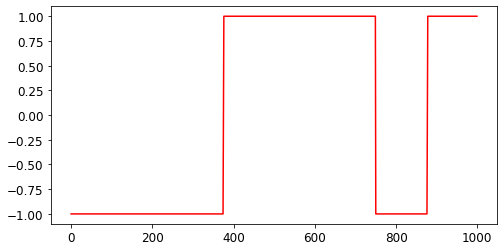

In [12]:
plt.figure(figsize = (8,4))

plt.plot(t_array, activity_array, 'r-')

plt.show()